# Unsupervised learning (nenadgledano učenje)

In [62]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [63]:
from IPython.display import display_html
def showReports(dfs,titles):
    htmls = []
    for df, title in zip(dfs, titles):
        html = f"<h4>{title}</h4>" + df.to_html(index=False)
        htmls.append(html)

    display_html(''.join(
        f'<div style="display:inline-block; vertical-align:top;text-align:center; padding:6px;">{html}</div>'
        for html in htmls
    ), raw=True)

def plot_3d_features(feature1:str,feature2:str,feature3:str,cat_features:list,df_scaled):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    clusters = df_scaled['Cluster'].unique()
    colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))

    for cluster, _ in zip(clusters, colors):
        cluster_data = df_scaled[df_scaled['Cluster'] == cluster]
        ax.scatter(
        cluster_data[feature1],
        cluster_data[feature2],
        cluster_data[feature3],
        label=f"{cluster}",
        alpha=0.7,
        s=30)

    ax.set_title(f"3D Scatter Plot: {feature1}, {feature2}, {feature3}")
    ax.set_xlabel(feature1, fontsize=9)
    ax.set_ylabel(feature2, fontsize=9)
    ax.set_zlabel(feature3, fontsize=9)

    '''if(feature1 in cat_features):
        ax.set_xticks(list(label_encoders[feature1].transform(label_encoders[feature1].classes_)))
        ax.set_xticklabels(label_encoders[feature1].classes_, fontsize=8)

    if(feature2 in cat_features):
        ax.set_yticks(list(label_encoders[feature2].transform(label_encoders[feature2].classes_)))
        ax.set_yticklabels(label_encoders[feature2].classes_, fontsize=8)
    if(feature3 in cat_features):
        ax.set_zticks(list(label_encoders[feature3].transform(label_encoders[feature3].classes_)))
        ax.set_zticklabels(label_encoders[feature3].classes_, fontsize=8)'''
        
    ax.legend(loc="best")
    ax.set_box_aspect(None, zoom=0.85)
    plt.show()

In [64]:
df = pd.read_csv("digital_literacy_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Age                                           1000 non-null   int64  
 2   Gender                                        1000 non-null   object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             1000 non-null   object 
 5   Household_Income                              1000 non-null   object 
 6   Location_Type                                 1000 non-null   object 
 7   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 8   Internet_Usage_Score                          1000 non-null   int64  
 9   Mobile_Literacy_Score                         1000 non-null   in

In [65]:
df.drop_duplicates(keep='first',inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 998
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       788 non-null    object 
 1   Age                                           788 non-null    int64  
 2   Gender                                        788 non-null    object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             788 non-null    object 
 5   Household_Income                              788 non-null    object 
 6   Location_Type                                 788 non-null    object 
 7   Basic_Computer_Knowledge_Score                788 non-null    int64  
 8   Internet_Usage_Score                          788 non-null    int64  
 9   Mobile_Literacy_Score                         788 non-null    int64  


In [66]:
df.drop(columns=['User_ID','Overall_Literacy_Score'], inplace=True)

## Opis karakteristika

| Karakteristika | Opis
| -------- | ------- |
| Age | Godina starosti osobe |
| Gender | Pol osobe |
| Education_Level | Nivo obrazovanja |
| Employment_status | Status zaposlenja |
| Household_Income  | Prihodi domacinstva |
| Location_Type  | Tip lokacije   |
| Basic_Computer_Knowledge_Score |  Osnovno znanje rada na racunaru |
| Internet_Usage_Score |  Rezultati koriscenja interneta   |
| Mobile_Literacy_Score | Rezultati koriscenja mobilnog  |
| Post_Training_Basic_Computer_Knowledge_Score | Znanje na racunaru posle obuke   |
| Post_Training_Internet_Usage_Score  | Znanje koriscenja interneta nakon obuke  |
| Post_Training_Mobile_Literacy_Score |  Znanje koriscenja mobilnog nakon obuke  |
| Modules_Completed  |  Zavrseni moduli   |
| Average_Time_Per_Module   | Prosecno vreme po modulu |
| Quiz_Performance  | Rezultati kviza   |
| Session_Count | Broj sesija |
| Engagement_Level  |   Nivo angazovanja  |
| Adaptability_Score | Rezultati prilagodljivosti   |
| Feedback_Rating   | Nivo povratne informacije|
| Skill_Application |  Primena vestina   |
| Employment_Impact |  Uticaj zaposljenja  |

In [67]:
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical features:", categorical_features)

Categorical features: ['Gender', 'Education_Level', 'Employment_Status', 'Household_Income', 'Location_Type', 'Engagement_Level', 'Employment_Impact']


In [68]:
for col in categorical_features:
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female' 'Other']
Education_Level: ['Primary' 'High School' 'Secondary']
Employment_Status: ['Student' 'Farmer' 'Other' 'Self-Employed' 'Unemployed']
Household_Income: ['Medium' 'Low' 'High']
Location_Type: ['Semi-Rural' 'Rural']
Engagement_Level: ['Low' 'Medium' 'High']
Employment_Impact: ['Yes' 'No']


In [69]:
from sklearn.preprocessing import OrdinalEncoder

# --- config ---
ordinal_cols = ["Education_Level", "Engagement_Level", "Household_Income"]
ordinal_categories = [
    ["Primary", "Secondary", "High School"],  # Education_Level
    ["Low", "Medium", "High"],                # Engagement_Level
    ["Low", "Medium", "High"]                 # Household_Income
]
nominal_cols = ["Employment_Status"]
label_cols   = ["Gender", "Location_Type", "Employment_Impact"]

# --- copy ---
df_encoded = df.copy()

# 1) Ordinal features (explicit order preserved)
oe = OrdinalEncoder(
    categories=ordinal_categories,
    dtype="int32",
    handle_unknown="use_encoded_value",
    unknown_value=-1
)
df_encoded[ordinal_cols] = oe.fit_transform(df_encoded[ordinal_cols]).astype("int32")

# 2) Unordered label-like features (fast, simple integer codes)
df_encoded[label_cols] = df_encoded[label_cols].apply(lambda col: pd.factorize(col, sort=True)[0]).astype("int32")

# 3) One-hot for nominal features (done in-place)
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, dtype="uint8")
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 998
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           788 non-null    int64  
 1   Gender                                        788 non-null    int32  
 2   Education_Level                               788 non-null    int32  
 3   Household_Income                              788 non-null    int32  
 4   Location_Type                                 788 non-null    int32  
 5   Basic_Computer_Knowledge_Score                788 non-null    int64  
 6   Internet_Usage_Score                          788 non-null    int64  
 7   Mobile_Literacy_Score                         788 non-null    int64  
 8   Post_Training_Basic_Computer_Knowledge_Score  788 non-null    int64  
 9   Post_Training_Internet_Usage_Score            788 non-null    int64  


In [70]:
'''label_mappings = {}
label_encoders = {}
encoding_dfs={}

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    encoding_dfs[col] = pd.DataFrame(
        list(label_mappings[col].items()),
        columns=[f"{col}_original", f"{col}_encoded"]
    )'''

'label_mappings = {}\nlabel_encoders = {}\nencoding_dfs={}\n\nfor col in df.select_dtypes(include=\'object\').columns:\n    le = LabelEncoder()\n    df[col] = le.fit_transform(df[col])\n    label_encoders[col] = le\n    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))\n    encoding_dfs[col] = pd.DataFrame(\n        list(label_mappings[col].items()),\n        columns=[f"{col}_original", f"{col}_encoded"]\n    )'

In [71]:
df_encoded.head()

Age  Gender  Education_Level  Household_Income  Location_Type  \
0   43       1                0                 1              1   
1   60       0                2                 0              0   
2   47       0                0                 0              1   
3   34       0                1                 0              0   
4   50       1                2                 1              0   

   Basic_Computer_Knowledge_Score  Internet_Usage_Score  \
0                              25                     1   
1                              22                    14   
2                              14                    31   
3                               6                    32   
4                              14                    41   

   Mobile_Literacy_Score  Post_Training_Basic_Computer_Knowledge_Score  \
0                     33                                            54   
1                     35                                            52   
2                     14                                            46   
3                     17                                            36   
4                     19                                            44   

   Post_Training_Internet_Usage_Score  ...  Engagement_Level  \
0                                  50  ...                 0   
1                                  39  ...                 0   
2                                  52  ...                 0   
3                                  73  ...                 1   
4                                  87  ...                 1   

   Adaptability_Score  Feedback_Rating  Skill_Application  Employment_Impact  \
0                  77                4                 51                  1   
1                  76                4                 98                  1   
2                  67                5                 75                  1   
3                  59                1                 61                  1   
4                  90                4                 82                  0   

   Employment_Status_Farmer  Employment_Status_Other  \
0                         0                        0   
1                         1                        0   
2                         1                        0   
3                         1                        0   
4                         0                        1   

   Employment_Status_Self-Employed  Employment_Status_Student  \
0                                0                          1   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   

   Employment_Status_Unemployed  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 25 columns]

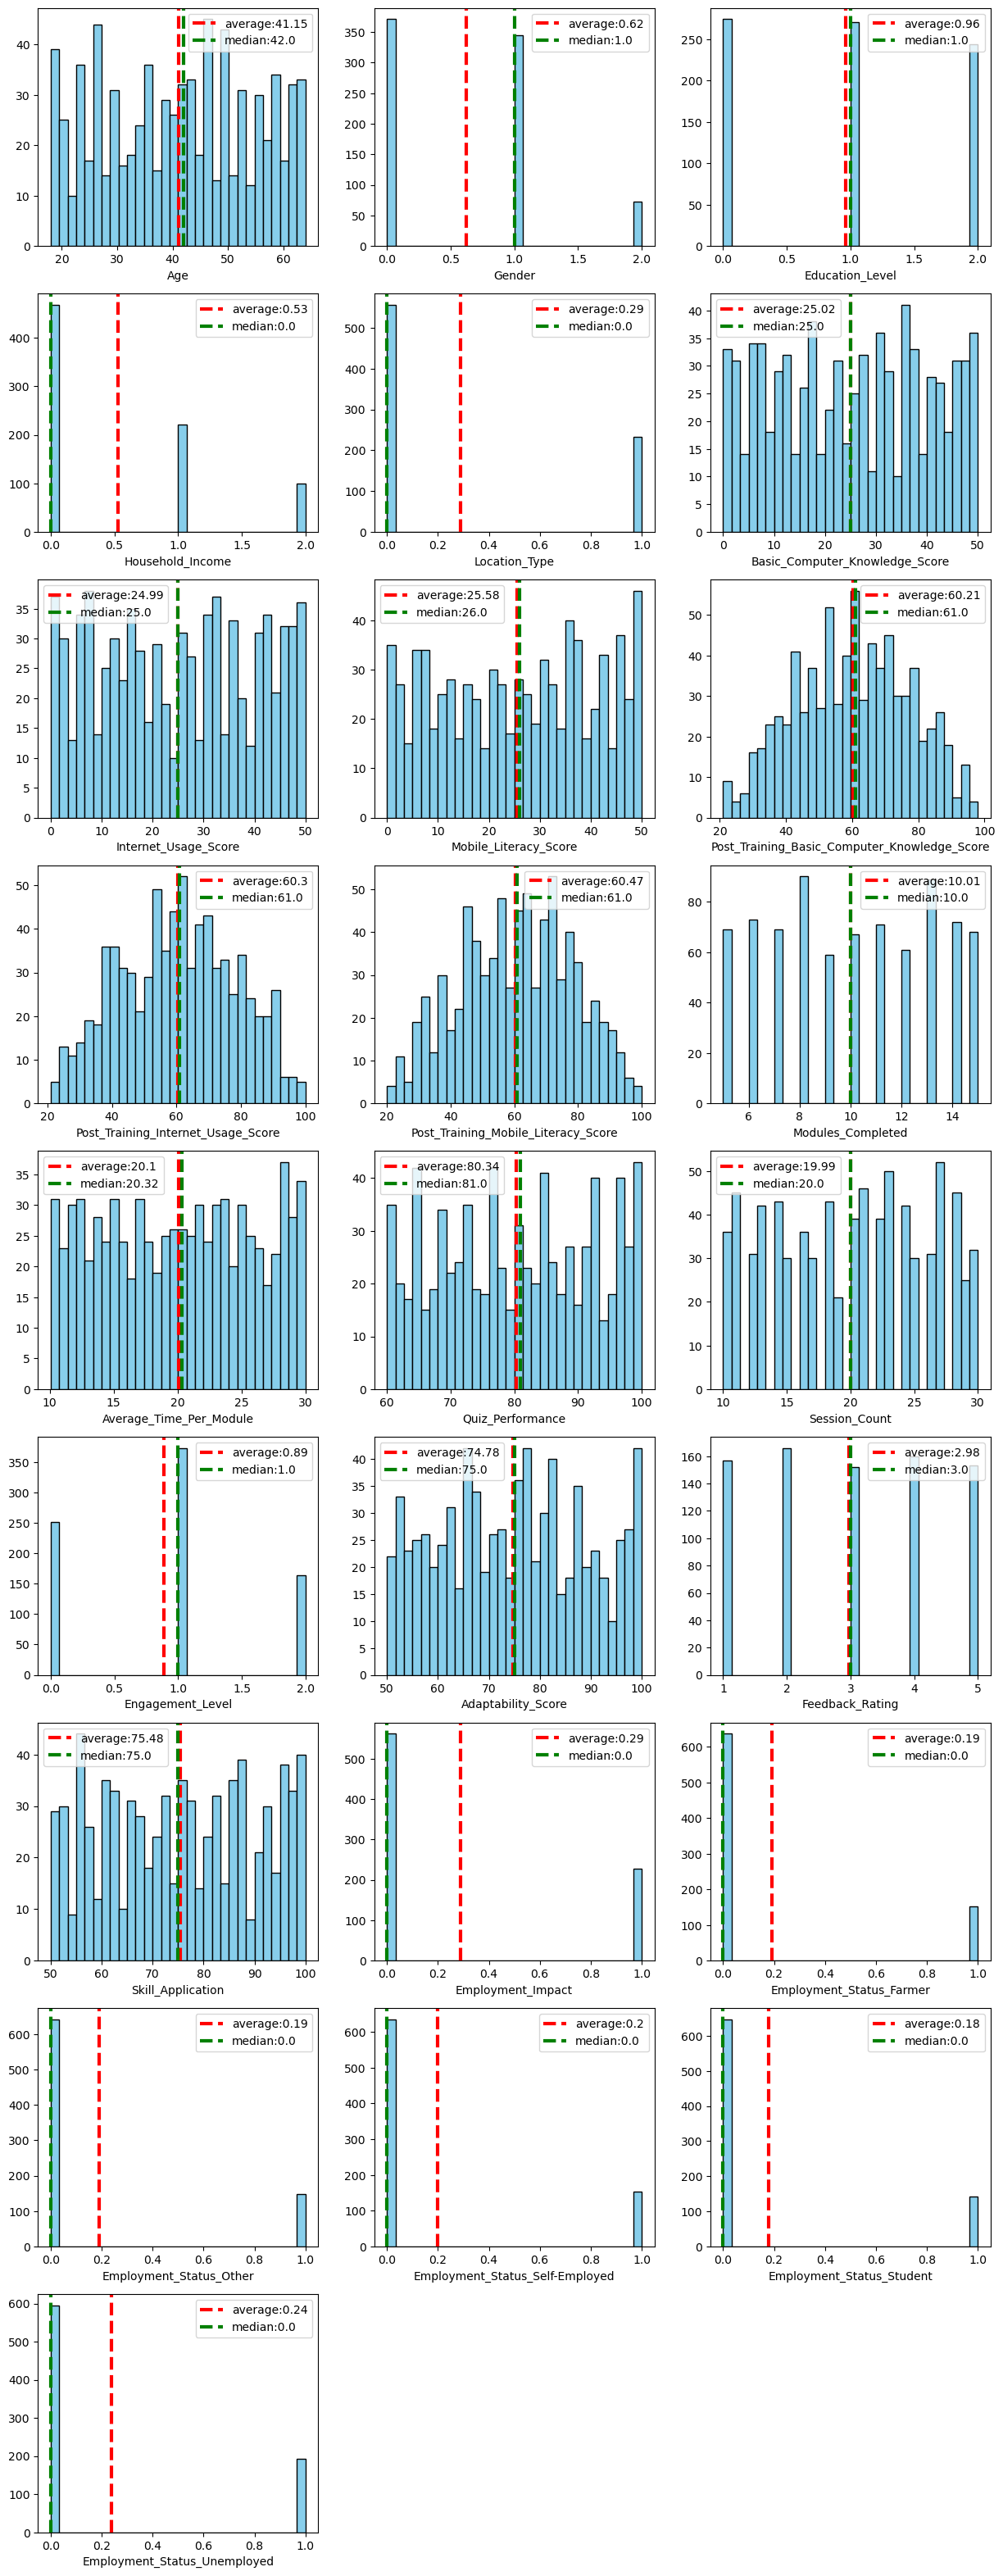

In [72]:
plt.figure(figsize=(15,40))
for ind,col in enumerate(df_encoded.columns):
    plt.subplot(9,3,ind+1)
    plt.hist(df_encoded[col], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.axvline(np.round(df_encoded[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df_encoded[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.legend([f'average:{np.round(df_encoded[col].mean(),2)}',f'median:{np.round(df_encoded[col].median(),2)}'])
plt.show()

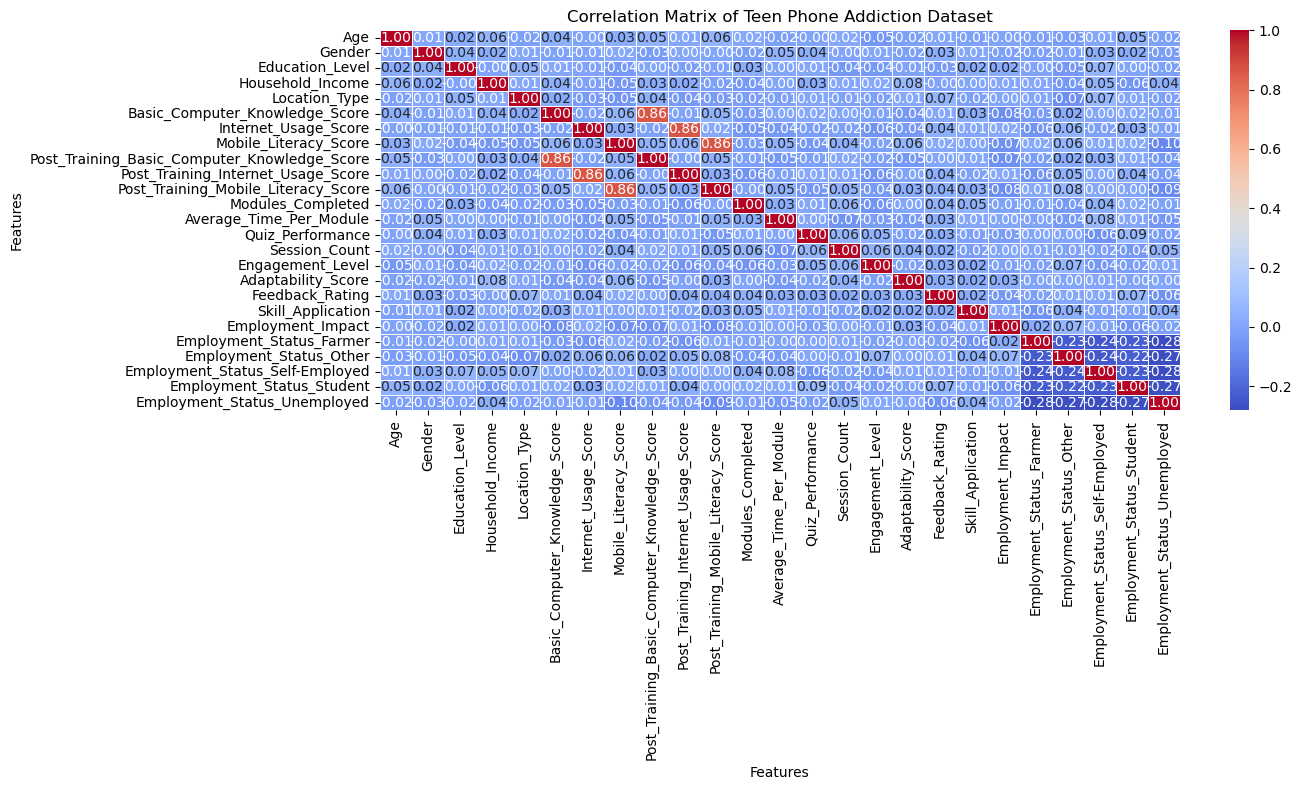

In [73]:
correlation_matrix = df_encoded.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(14, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

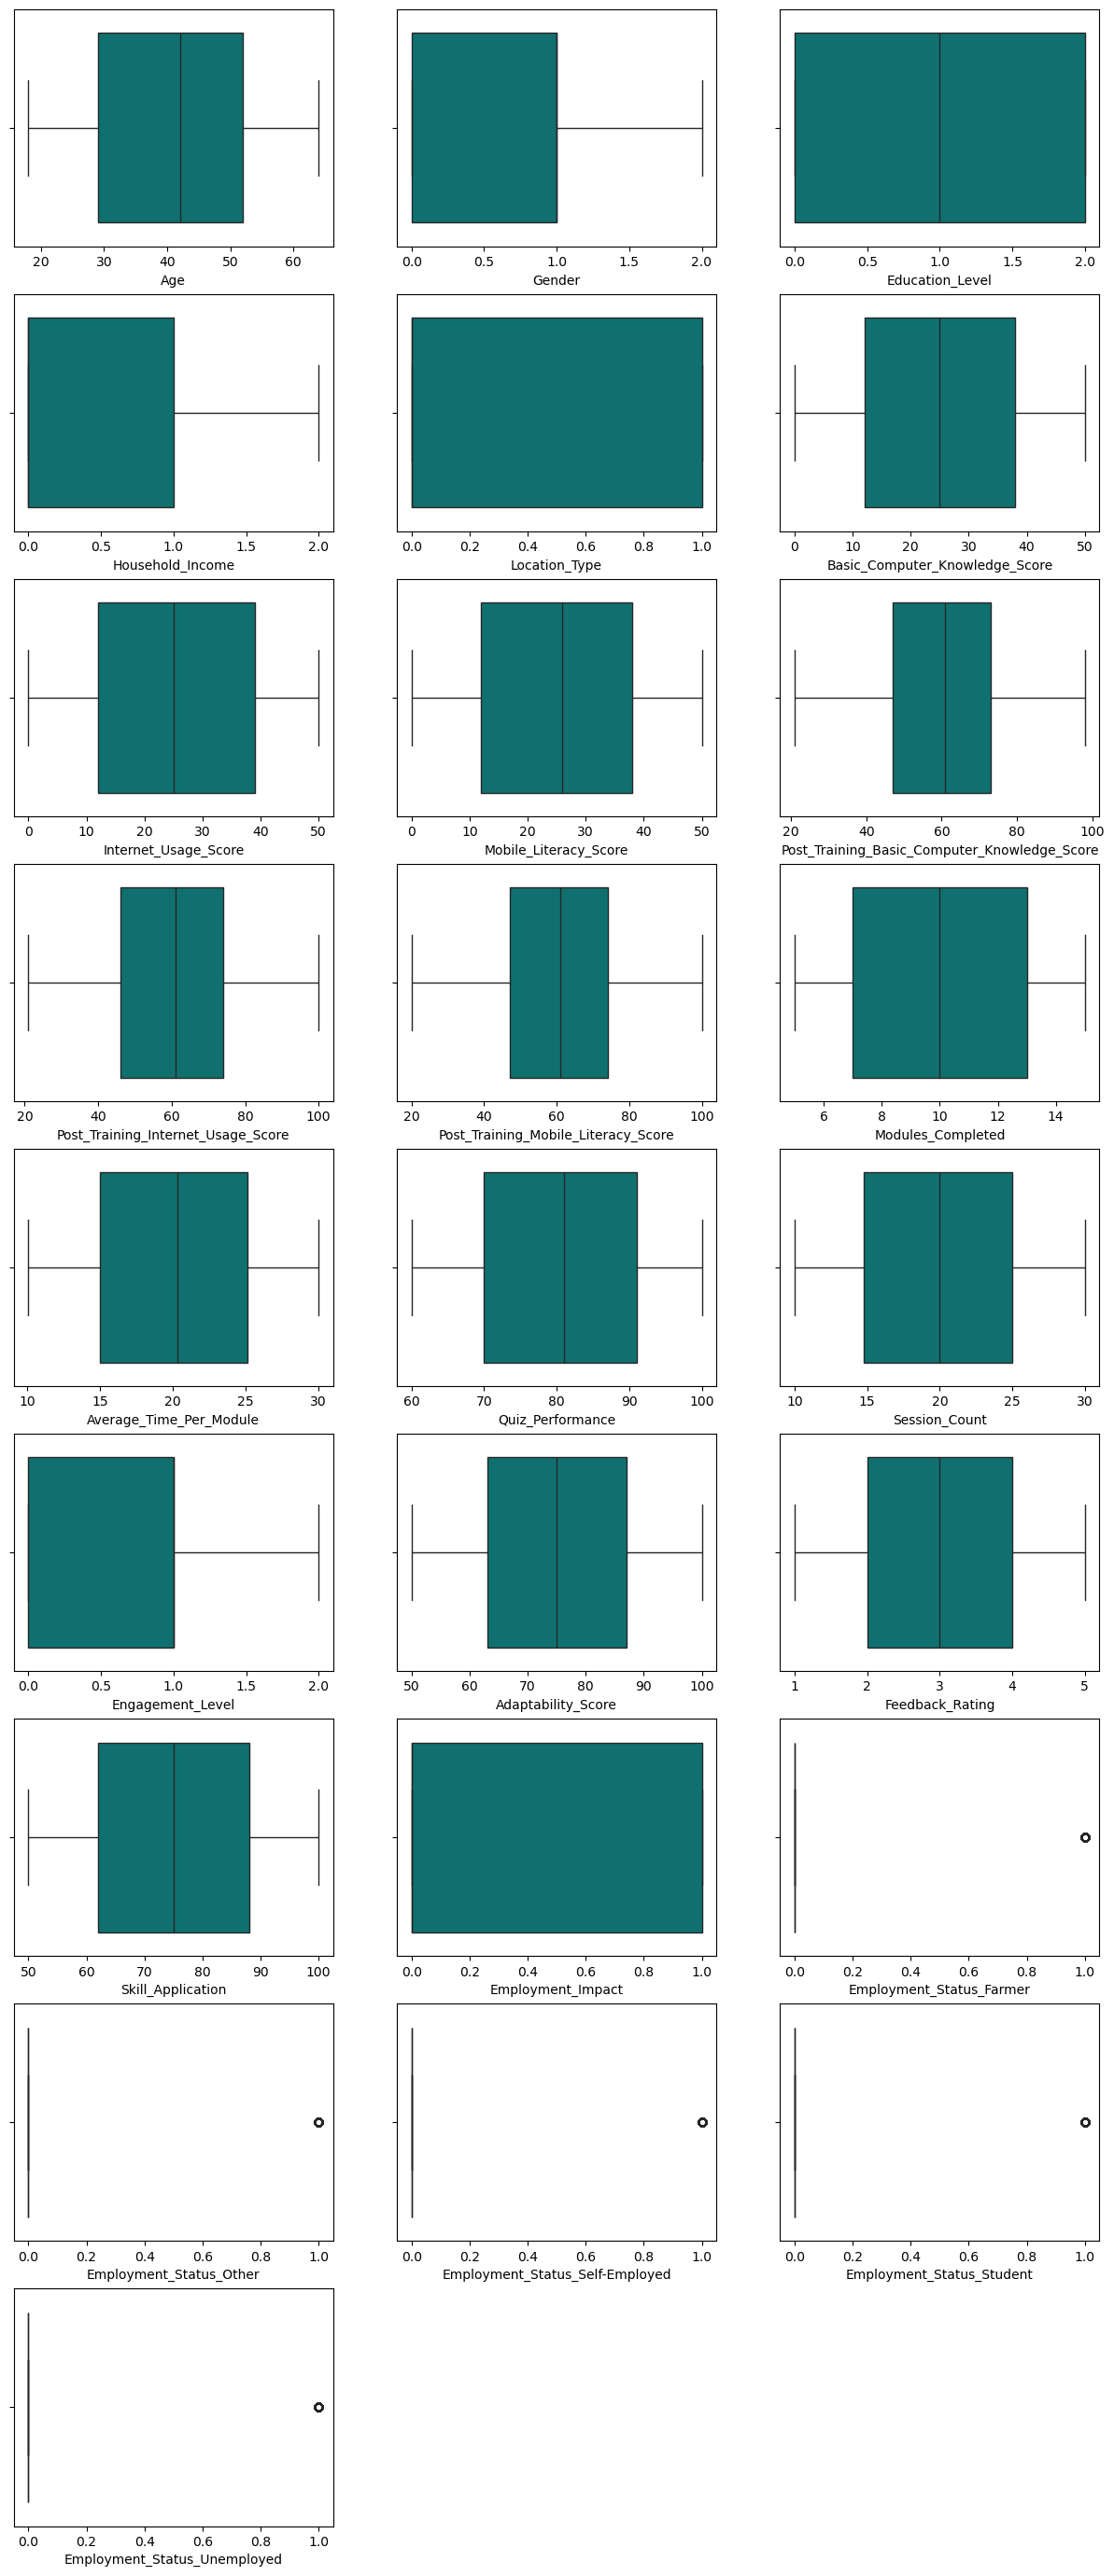

In [74]:
fig = plt.figure(figsize=(15,35))
for i, col in enumerate(df_encoded.columns):
  plt.subplot(9,3,i+1)
  seaborn.boxplot(x = df_encoded[col], color='teal')
  plt.xlabel(col)

## PCA feature reduction

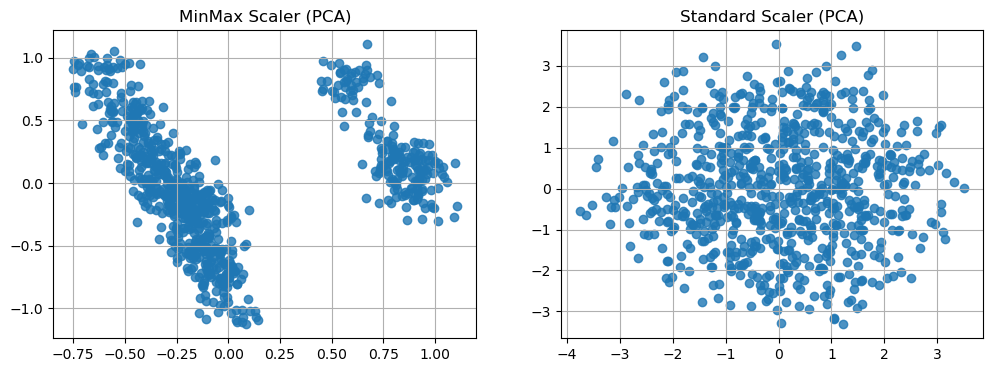

In [75]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

df_minmax= minmax_scaler.fit_transform(df_encoded)
df_minmax = pd.DataFrame(df_minmax, columns=df_encoded.columns)

pca_minmax = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result_minmax = pca_minmax.fit_transform(df_minmax)

df_std= std_scaler.fit_transform(df_encoded)
df_std = pd.DataFrame(df_std, columns=df_encoded.columns)

pca_std = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result_std = pca_std.fit_transform(df_std)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(pca_result_minmax[:, 0], pca_result_minmax[:, 1], alpha=0.8)
plt.title(f"MinMax Scaler (PCA)")
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(pca_result_std[:, 0], pca_result_std[:, 1], alpha=0.8)
plt.title(f"Standard Scaler (PCA)")
plt.grid()
plt.show()
df_scaled=df_minmax

In [76]:
def importance_pca(pca:PCA,title:str="PCA Feature Importance"):
    loadings = pca.components_.T  # shape: [n_features, n_components]
    importance = pd.DataFrame(
        loadings,
        index=df_encoded.columns,
        columns=[f'PC{i+1}' for i in range(loadings.shape[1])]
    )
    importance=importance.abs()
    importance=importance.max(axis=1,)
    importance=importance.sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    importance.sort_values(ascending=True).plot(kind="barh")
    plt.title(title)
    plt.xlabel("Max |Feature| across PCs")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    print(importance.head(4))

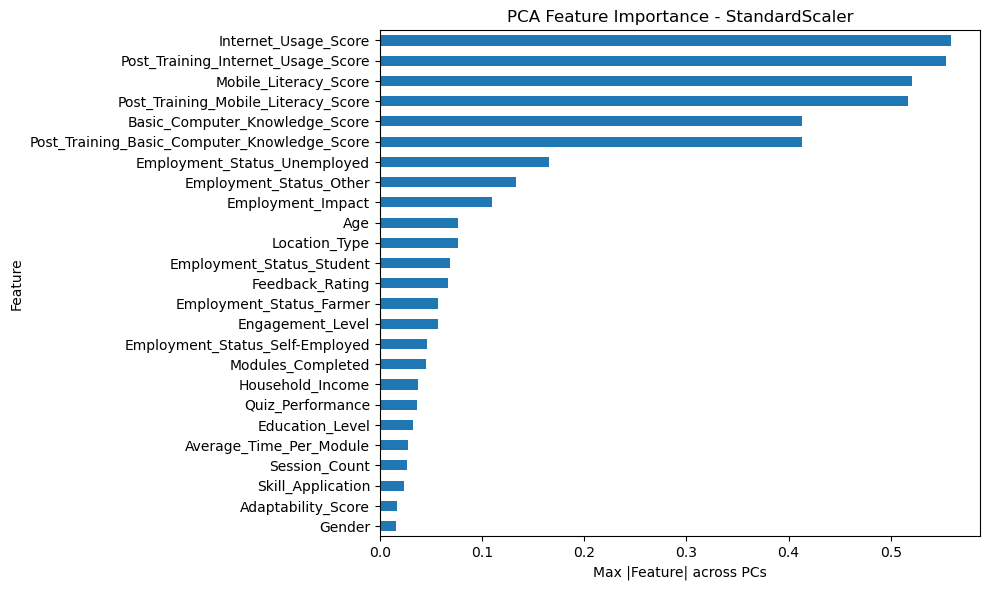

Internet_Usage_Score                   0.559333
Post_Training_Internet_Usage_Score     0.553624
Mobile_Literacy_Score                  0.521213
Post_Training_Mobile_Literacy_Score    0.517199
dtype: float64


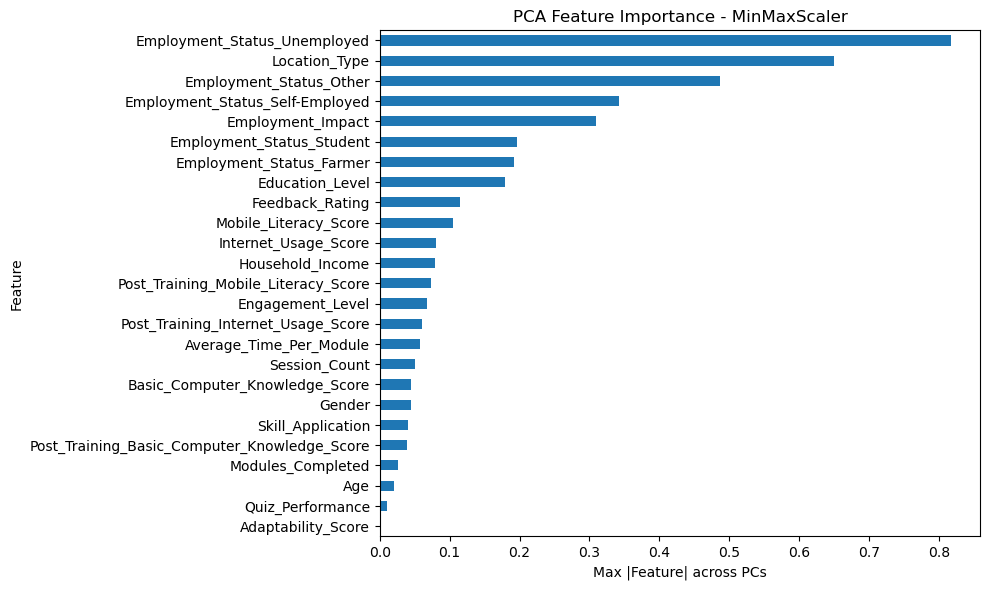

Employment_Status_Unemployed       0.817815
Location_Type                      0.649794
Employment_Status_Other            0.486448
Employment_Status_Self-Employed    0.342381
dtype: float64


In [77]:
importance_pca(pca_std,title="PCA Feature Importance - StandardScaler")
importance_pca(pca_minmax,title="PCA Feature Importance - MinMaxScaler")

## T-SNE feature reduction

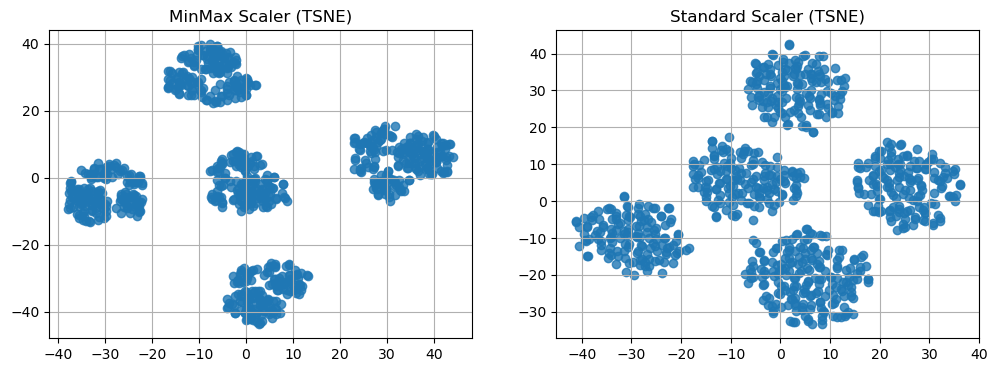

In [78]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

df_minmax= minmax_scaler.fit_transform(df_encoded)
df_minmax = pd.DataFrame(df_minmax, columns=df_encoded.columns)

tsne_minmax = TSNE(n_components=2, random_state=0) #Smanjenje dimenzionalnosti na 2 komponente
tsne_result_minmax = tsne_minmax.fit_transform(df_minmax)

df_std= std_scaler.fit_transform(df_encoded)
df_std = pd.DataFrame(df_std, columns=df_encoded.columns)

tsne_std = TSNE(n_components=2,random_state=0) #Smanjenje dimenzionalnosti na 2 komponente
tsne_result_std = tsne_std.fit_transform(df_std)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(tsne_result_minmax[:, 0], tsne_result_minmax[:, 1], alpha=0.8)
plt.title(f"MinMax Scaler (TSNE)")
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(tsne_result_std[:, 0], tsne_result_std[:, 1], alpha=0.8)
plt.title(f"Standard Scaler (TSNE)")
plt.grid()
plt.show()

## K-Means

### PCA

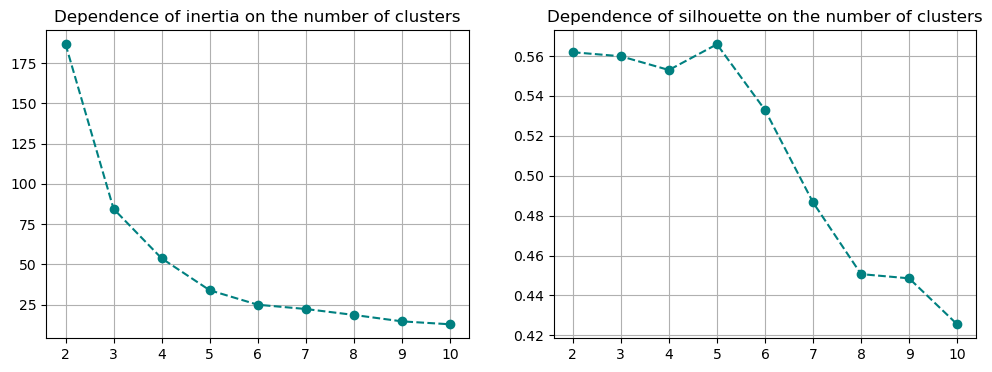

In [79]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cols = ['Cluster',"Cluster_Name"]
data = df_scaled.drop(['Cluster', 'Cluster_Name'], axis=1) if all(col in df_scaled.columns for col in cols) else df_scaled.copy()

pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result = pca.fit_transform(data)

inertia = []
siluette = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=18)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)
    if len(set(kmeans.labels_)) > 1:
        siluette.append(silhouette_score(pca_result, kmeans.labels_))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of inertia on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, siluette, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of silhouette on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.show()


Na osnovu grafika inercije i zavisnosti vrednosti siluete možemo zaključiti da je optimalan broj klastera 5. Na grafiku inercije se "lakat" uočava kod 5 klastera, osim toga maksimalna vrednost siluete potvrđuje klasterizacija u 5 klastera.

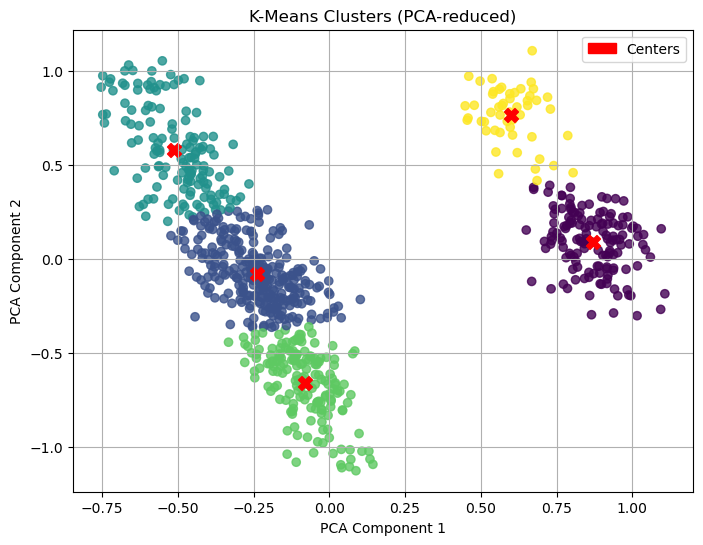

In [80]:
import matplotlib.patches as mpatches

kmeans = KMeans(n_clusters=5, random_state=18)
df_scaled['Cluster'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1],
    c=df_scaled['Cluster'], cmap='viridis', alpha=0.8
)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centers')

legend_handles = []
legend_handles.append(mpatches.Patch(color='red', label='Centers'))

plt.legend(handles=legend_handles, loc='upper right')
plt.title('K-Means Clusters (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [81]:
print(kmeans.cluster_centers_)
f=kmeans.cluster_centers_.std(axis=0)
print(f)

[[ 0.86847168  0.0910144 ]
 [-0.23966638 -0.0773834 ]
 [-0.51144366  0.58116891]
 [-0.08058232 -0.65855429]
 [ 0.59911417  0.76592656]]
[0.52111742 0.50472908]


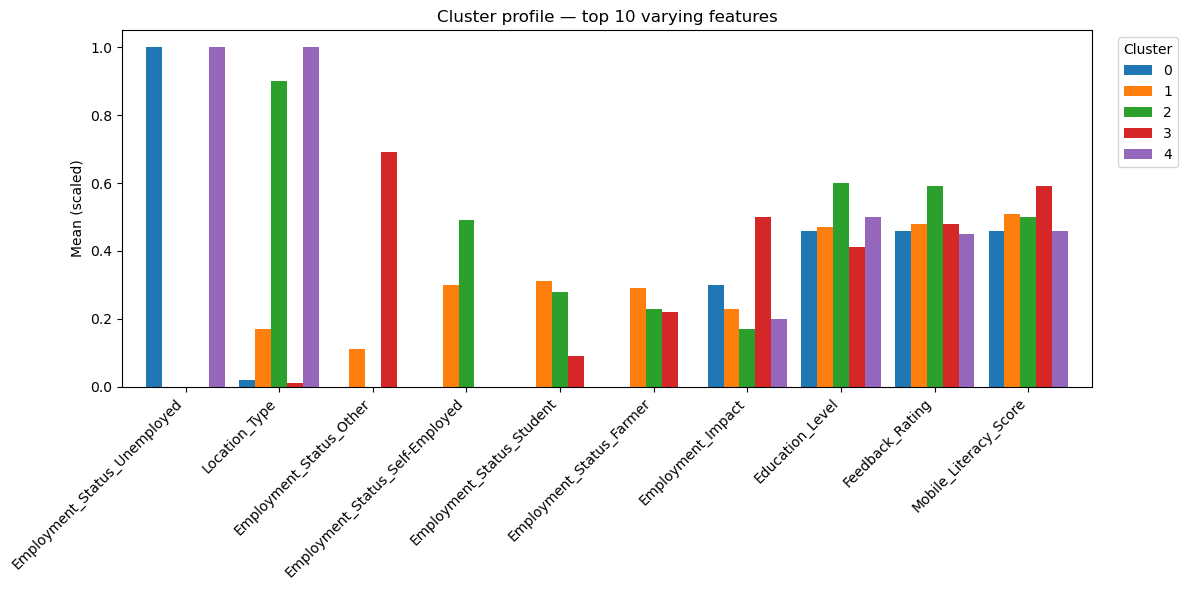

In [82]:
cluster_profile = df_scaled.groupby('Cluster').mean().round(2)
topk = (cluster_profile.var(axis=0)
        .sort_values(ascending=False)
        .head(10)
        .index)

ax = cluster_profile[topk].T.plot(kind='bar', figsize=(12, 6), width=0.85)
ax.set_title("Cluster profile — top 10 varying features")
ax.set_ylabel("Mean (scaled)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [83]:
df_scaled['Digital_Score'] = (
    df_scaled['Internet_Usage_Score'] +
    df_scaled['Mobile_Literacy_Score'] +
    df_scaled['Basic_Computer_Knowledge_Score']
)

cluster_profile = df_scaled.groupby('Cluster')[
    [
        "Cluster",
        'Digital_Score',
        'Internet_Usage_Score',
        'Mobile_Literacy_Score',
        'Basic_Computer_Knowledge_Score'        
    ]
].mean().round(2).sort_values(by='Digital_Score', ascending=False)

showReports(
    dfs=[cluster_profile],
    titles=["Cluster Profile"] 
)

df_scaled.drop(columns=['Digital_Score'], inplace=True)

Cluster Profile 
 
 
 Cluster 
 Digital_Score 
 Internet_Usage_Score 
 Mobile_Literacy_Score 
 Basic_Computer_Knowledge_Score 
 
 
 
 
 3.0 
 1.58 
 0.54 
 0.59 
 0.45 
 
 
 1.0 
 1.52 
 0.50 
 0.51 
 0.52 
 
 
 2.0 
 1.49 
 0.47 
 0.50 
 0.53 
 
 
 0.0 
 1.45 
 0.50 
 0.46 
 0.50 
 
 
 4.0 
 1.44 
 0.49 
 0.46 
 0.49

In [84]:
'''cluster_names = {
    0: "Level 1",
    1: "Level 2",
    2: "Level 3",
    3: "Level 4",
    4: "Level 5",
}
df_scaled['Cluster_Name'] = df_scaled['Cluster'].map(cluster_names)

mapping_df = pd.DataFrame(
    list(cluster_names.items()),
    columns=["Cluster Number", "Cluster Name"]
)

showReports(
    dfs=[mapping_df],
    titles=["Cluster Mapping"]
)'''

'cluster_names = {\n    0: "Level 1",\n    1: "Level 2",\n    2: "Level 3",\n    3: "Level 4",\n    4: "Level 5",\n}\ndf_scaled[\'Cluster_Name\'] = df_scaled[\'Cluster\'].map(cluster_names)\n\nmapping_df = pd.DataFrame(\n    list(cluster_names.items()),\n    columns=["Cluster Number", "Cluster Name"]\n)\n\nshowReports(\n    dfs=[mapping_df],\n    titles=["Cluster Mapping"]\n)'

In [85]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           788 non-null    float64
 1   Gender                                        788 non-null    float64
 2   Education_Level                               788 non-null    float64
 3   Household_Income                              788 non-null    float64
 4   Location_Type                                 788 non-null    float64
 5   Basic_Computer_Knowledge_Score                788 non-null    float64
 6   Internet_Usage_Score                          788 non-null    float64
 7   Mobile_Literacy_Score                         788 non-null    float64
 8   Post_Training_Basic_Computer_Knowledge_Score  788 non-null    float64
 9   Post_Training_Internet_Usage_Score            788 non-null    flo

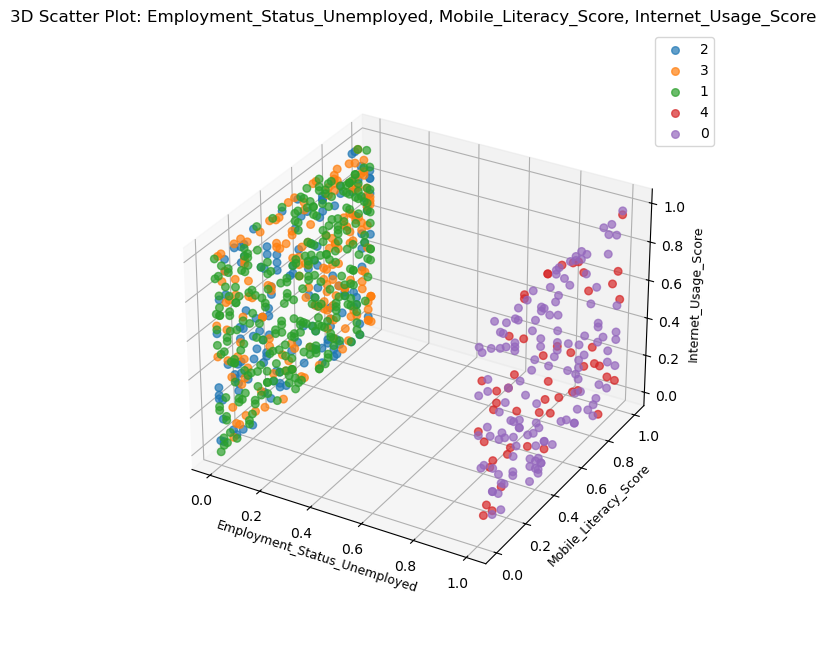

In [86]:
plot_3d_features('Employment_Status_Unemployed','Mobile_Literacy_Score',"Internet_Usage_Score",cat_features=[],df_scaled=df_scaled)

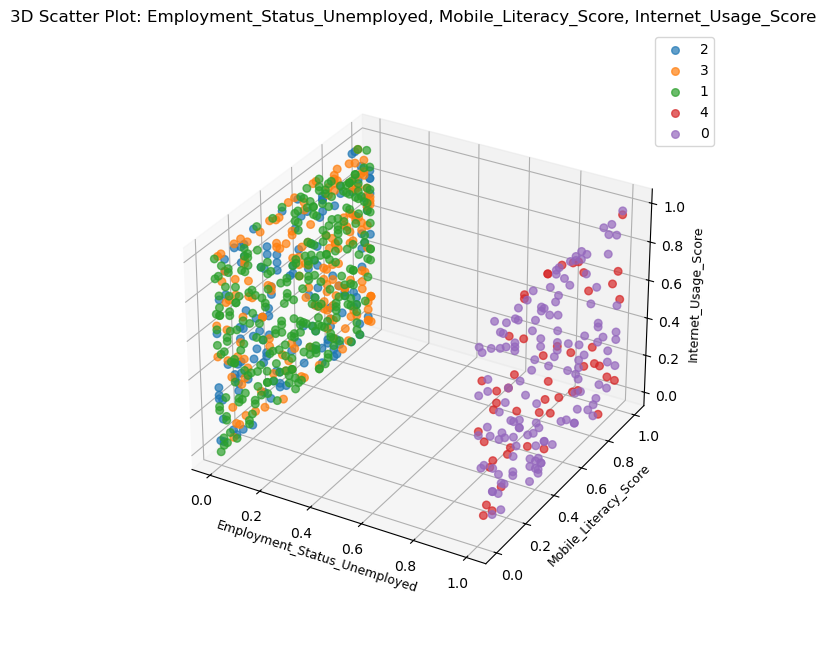

In [87]:
plot_3d_features('Employment_Status_Unemployed','Mobile_Literacy_Score',"Internet_Usage_Score",cat_features=[],df_scaled=df_scaled)

### Original dataset

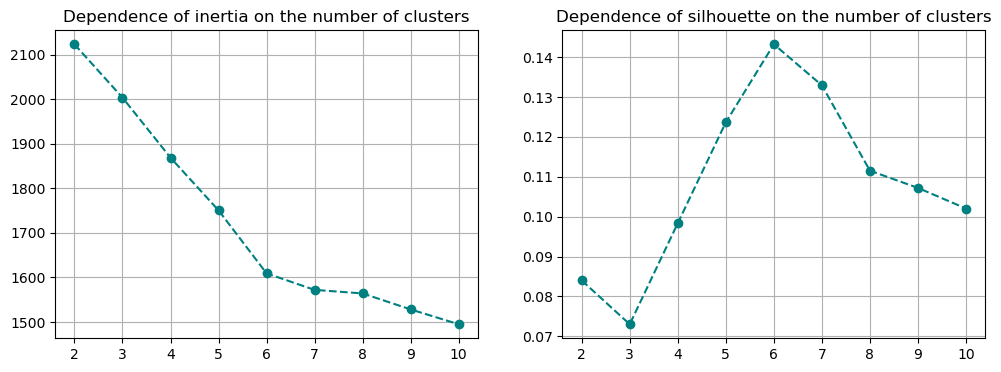

In [95]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cols = ['Cluster']
data = df_scaled.drop(['Cluster'], axis=1) if all(col in df_scaled.columns for col in cols) else df_scaled.copy()

#pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
#pca_result = pca.fit_transform(data)

inertia = []
siluette = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=18)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    if len(set(kmeans.labels_)) > 1:
        siluette.append(silhouette_score(data, kmeans.labels_))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of inertia on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, siluette, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of silhouette on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.show()


In [99]:
import matplotlib.patches as mpatches
data = df_scaled.drop(['Cluster'], axis=1) if all(col in df_scaled.columns for col in cols) else df_scaled.copy()

kmeans = KMeans(n_clusters=5, random_state=18)
df_scaled['Cluster'] = kmeans.fit_predict(data)

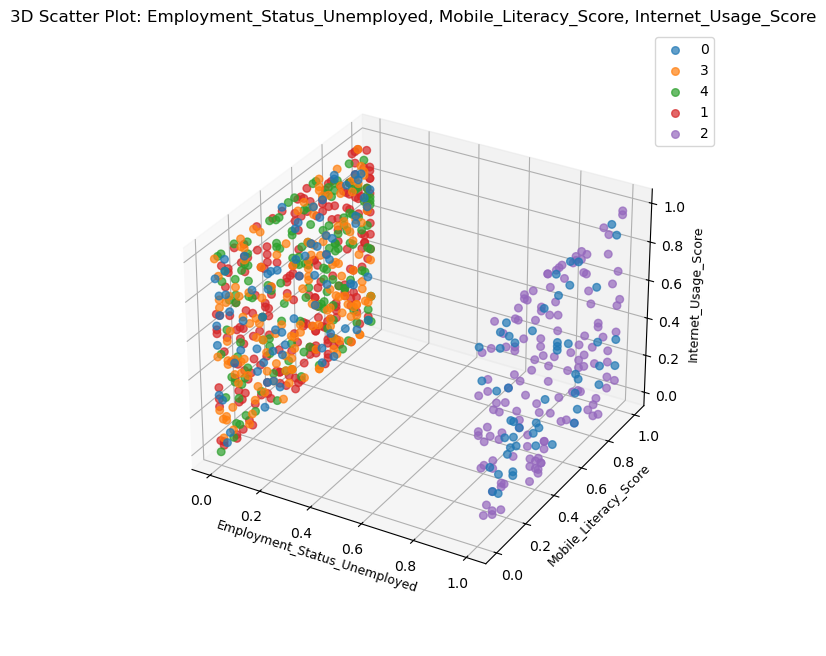

In [101]:
plot_3d_features('Employment_Status_Unemployed','Mobile_Literacy_Score',"Internet_Usage_Score",cat_features=[],df_scaled=df_scaled)

### TSNE

## DBSCAN


StandardScaler DBSCAN cluster counts:
-1     176
 0     511
 1       9
 2       5
 3      26
 4       7
 5      10
 6      11
 7       8
 8       9
 9       9
 10      7
Name: count, dtype: int64

MinMaxScaler DBSCAN cluster counts:
0     67
1    160
2    396
3    165
Name: count, dtype: int64


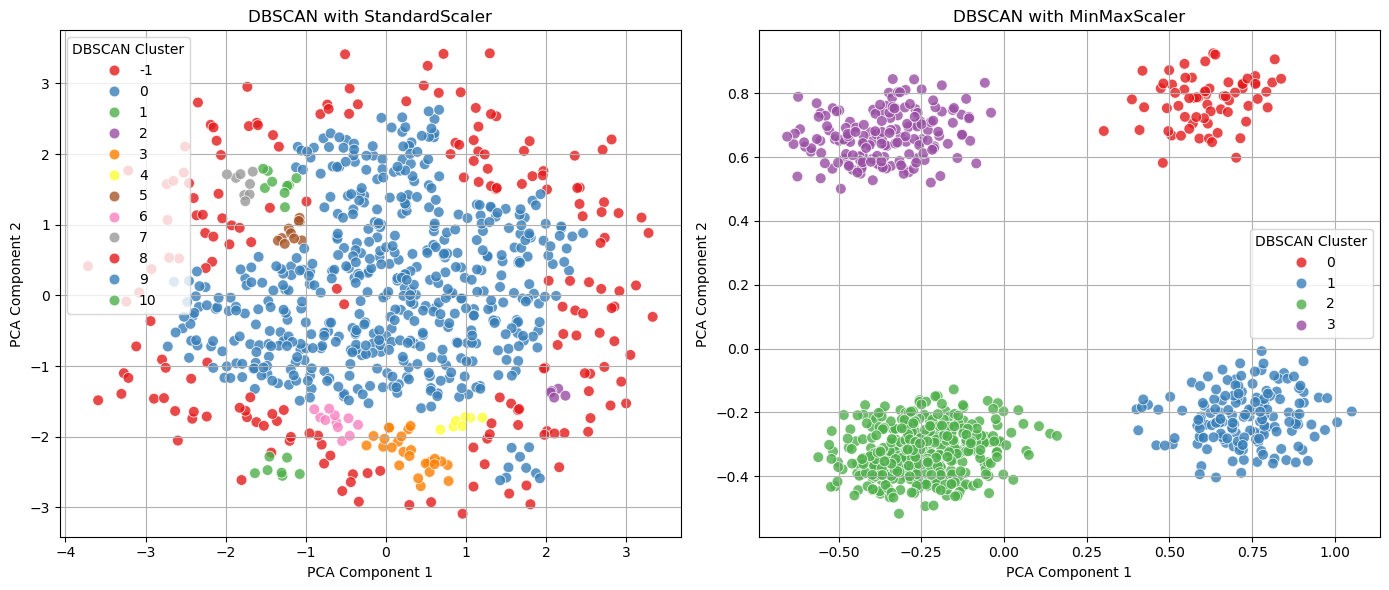

In [ ]:
# Comparison between StandardScaler and MinMaxScaler for DBSCAN clustering

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler

cols = ['Cluster', 'Cluster_Name','Digital_Score']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    dbscan = DBSCAN(eps=0.23, min_samples=5)
    dbscan_labels = dbscan.fit_predict(pca_result)
    results[scaler_name] = {
        "labels": dbscan_labels,
        "pca_result": pca_result
    }
    print(f"\n{scaler_name} DBSCAN cluster counts:")
    print(pd.Series(dbscan_labels).value_counts().sort_index())

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, (scaler_name, res) in zip(axes, results.items()):
    palette = seaborn.color_palette("Set1", n_colors=len(set(res["labels"])))
    seaborn.scatterplot(
        x=res["pca_result"][:, 0], y=res["pca_result"][:, 1],
        hue=res["labels"],
        palette=palette,
        legend='full',
        alpha=0.8,
        s=60,
        ax=ax
    )
    ax.set_title(f"DBSCAN with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="DBSCAN Cluster")
    ax.grid(True)

plt.tight_layout()
plt.show()

## Hierarchical Agglomerative clustering

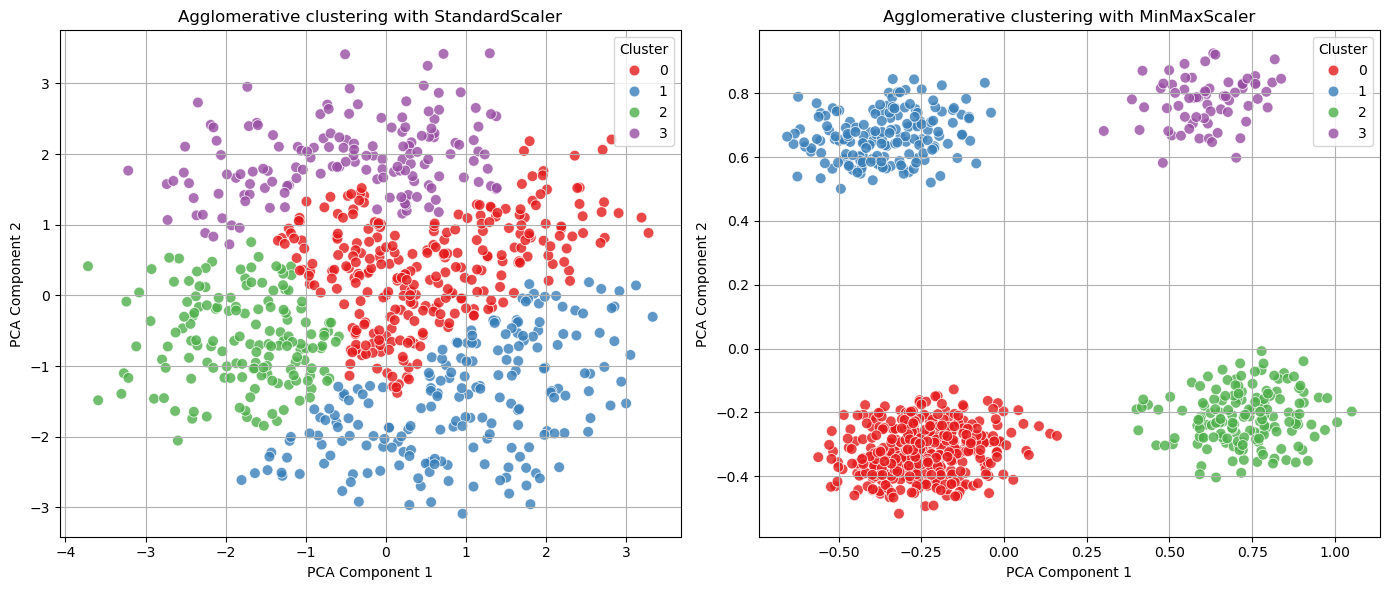

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    aggclust = AgglomerativeClustering(n_clusters=4)
    aggclust_labels = aggclust.fit_predict(pca_result)
    results[scaler_name] = {
        "labels": aggclust_labels,
        "pca_result": pca_result,
        "scaled_data":scaled_data
    }

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, (scaler_name, res) in zip(axes, results.items()):
    palette = seaborn.color_palette("Set1", n_colors=len(set(res["labels"])))
    seaborn.scatterplot(
        x=res["pca_result"][:, 0], y=res["pca_result"][:, 1],
        hue=res["labels"],
        palette=palette,
        legend='full',
        alpha=0.8,
        s=60,
        ax=ax
    )
    ax.set_title(f"Agglomerative clustering with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="Cluster")
    ax.grid(True)

plt.tight_layout()
plt.show()


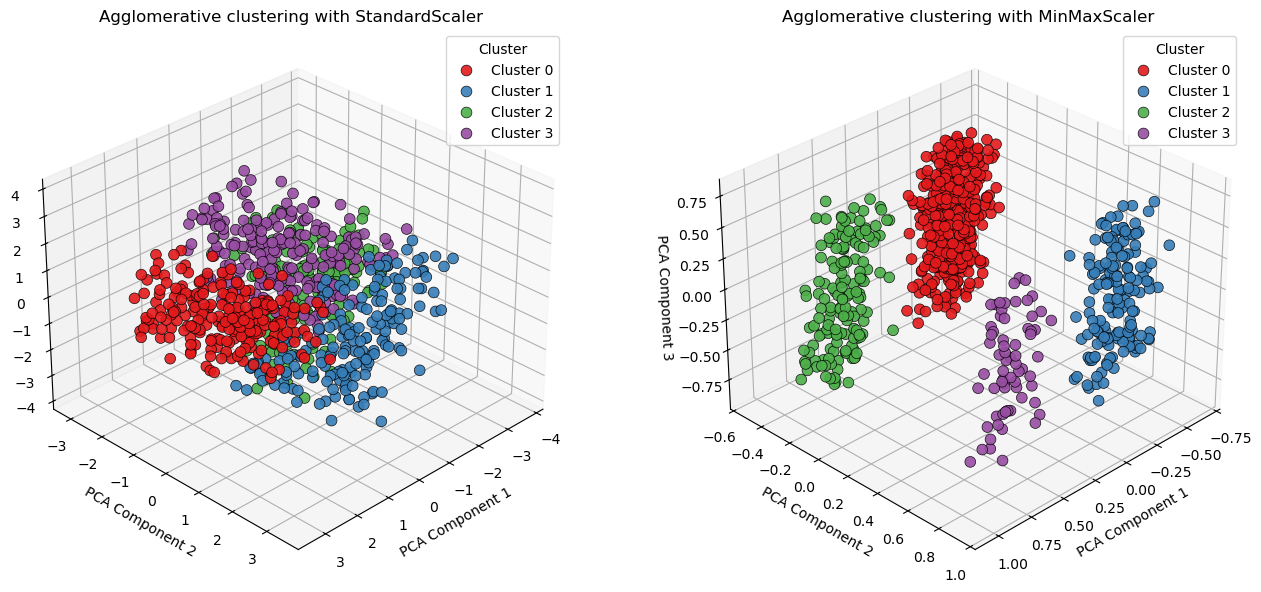

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}


for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=3)  # 3D PCA
    pca_result_3d = pca.fit_transform(scaled_data)
    
    aggclust = AgglomerativeClustering(n_clusters=4)
    aggclust_labels = aggclust.fit_predict(pca_result_3d)
    
    results[scaler_name] = {
        "labels": aggclust_labels,
        "pca_result": pca_result_3d,
        "scaled_data": scaled_data
    }


fig = plt.figure(figsize=(14, 6))

for i, (scaler_name, res) in enumerate(results.items()):
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    unique_labels = sorted(set(res["labels"]))
    palette = sns.color_palette("Set1", n_colors=len(unique_labels))
    
    for lbl, color in zip(unique_labels, palette):
        idx = res["labels"] == lbl
        ax.scatter(
            res["pca_result"][idx, 0],
            res["pca_result"][idx, 1],
            res["pca_result"][idx, 2],
            c=[color],
            label=f'Cluster {lbl}',
            s=60,          # ista veličina kao u PCA/t-SNE
            alpha=0.9,
            edgecolor='k',
            linewidth=0.5
        )
    
    ax.set_title(f"Agglomerative clustering with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3")
    ax.view_init(elev=30, azim=45)
    ax.legend(title="Cluster")

plt.tight_layout()
plt.show()


Threshold for 4 clusters: 8.188648576170745


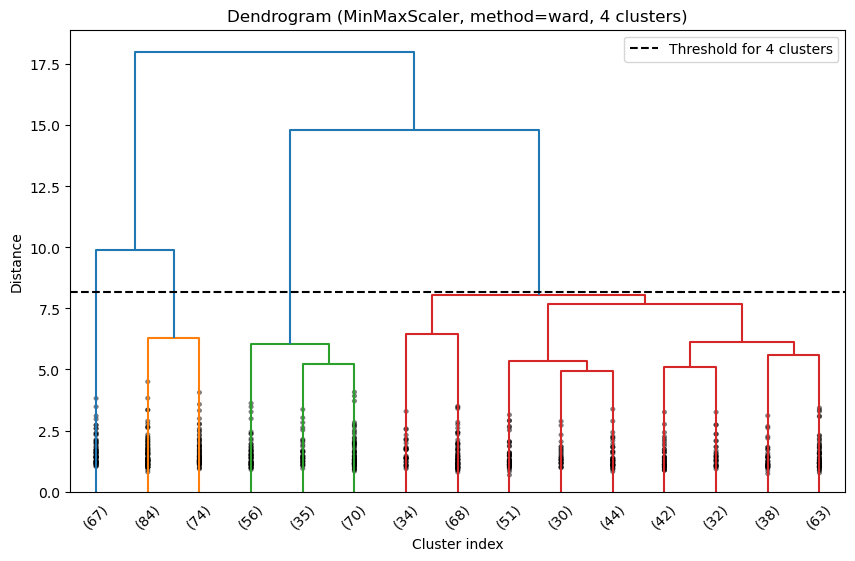

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(results[scaler_name]["scaled_data"], method="ward")

# Determine the threshold that gives 4 clusters
max_d = 0.0
for t in np.linspace(0, np.max(Z[:, 2]), 100):
    if len(np.unique(fcluster(Z, t, criterion='distance'))) == 4:
        max_d = t
        break

print(f"Threshold for 4 clusters: {max_d}")

# Plot dendrogram with color threshold
plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    truncate_mode="lastp",
    p=15,
    leaf_rotation=45.,
    leaf_font_size=10.,
    show_contracted=True,
    color_threshold=max_d
)
plt.title(f"Dendrogram ({scaler_name}, method=ward, 4 clusters)")
plt.xlabel("Cluster index")
plt.ylabel("Distance")
plt.axhline(y=max_d, c='k', ls='--', label=f'Threshold for 4 clusters')
plt.legend()
plt.show()

## Mean Shift Clustering

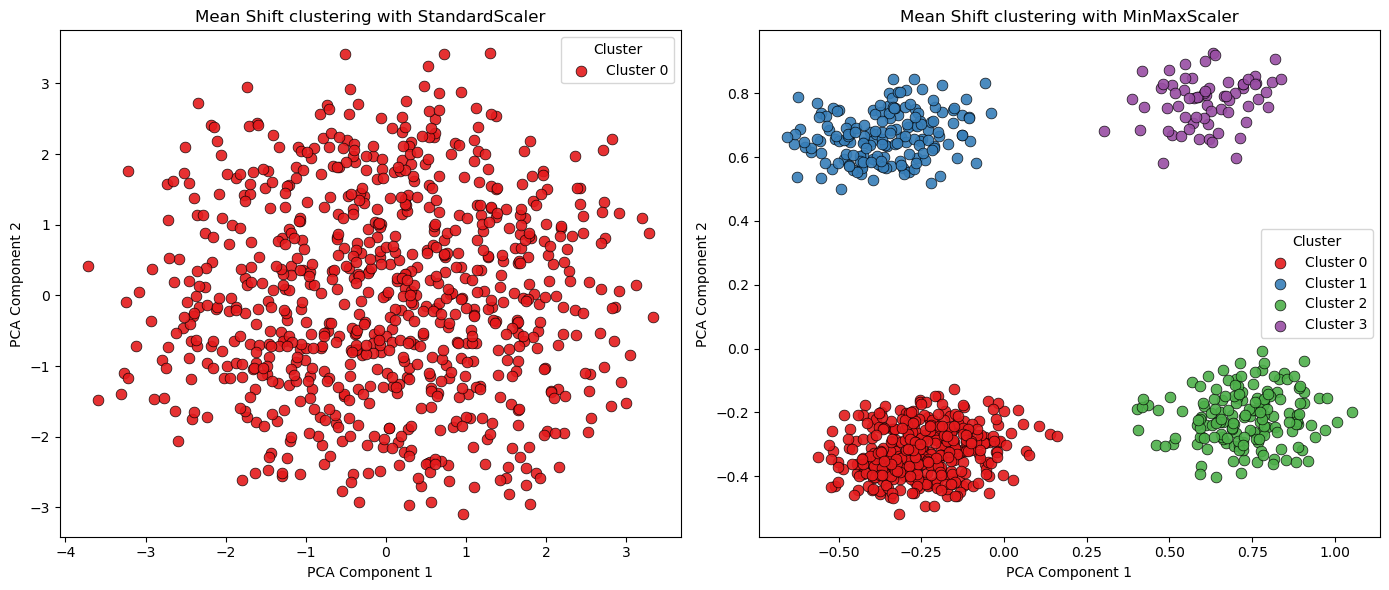

In [23]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=2)  # 3D PCA
    pca_result = pca.fit_transform(scaled_data)
    
    mean_shift = MeanShift()
    labels = mean_shift.fit_predict(pca_result)
    
    results[scaler_name] = {
        "labels": labels,
        "pca_result": pca_result,
        "scaled_data": scaled_data
    }


fig = plt.figure(figsize=(14, 6))

for i, (scaler_name, res) in enumerate(results.items()):
    ax = fig.add_subplot(1, 2, i+1)
    
    unique_labels = sorted(set(res["labels"]))
    palette = sns.color_palette("Set1", n_colors=len(unique_labels))
    
    for lbl, color in zip(unique_labels, palette):
        idx = res["labels"] == lbl
        ax.scatter(
            res["pca_result"][idx, 0],
            res["pca_result"][idx, 1],
            c=[color],
            label=f'Cluster {lbl}',
            s=60,          # ista veličina kao u PCA/t-SNE
            alpha=0.9,
            edgecolor='k',
            linewidth=0.5
        )
    
    ax.set_title(f"Mean Shift clustering with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="Cluster")

plt.tight_layout()
plt.show()


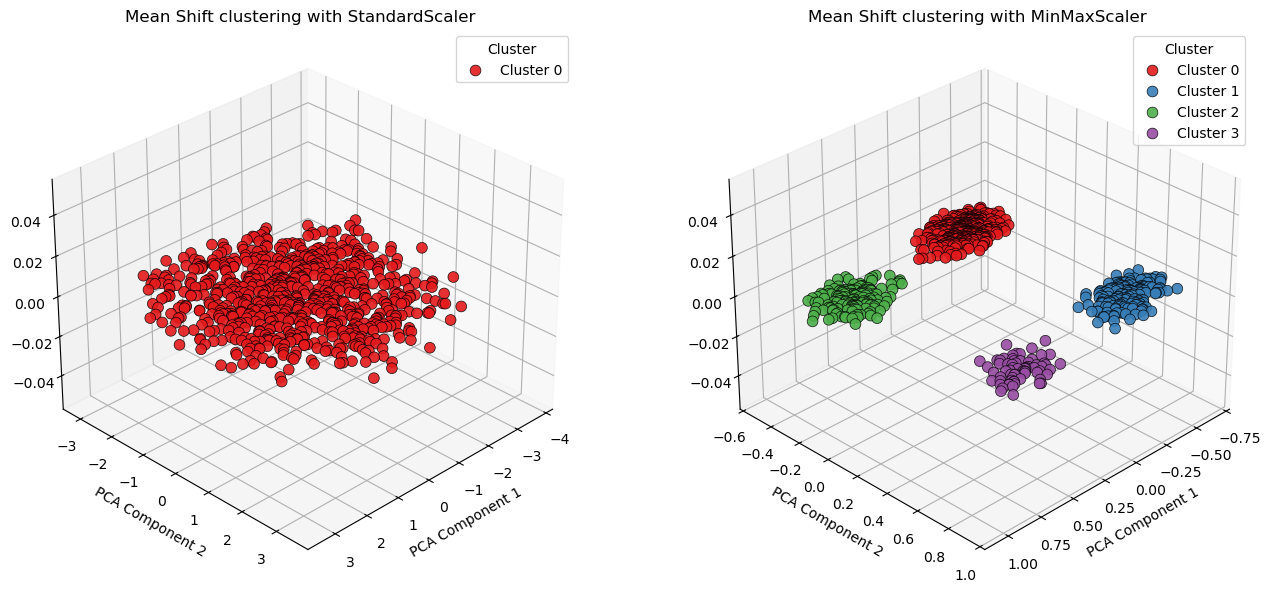

In [24]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=3)  # 3D PCA
    pca_result = pca.fit_transform(scaled_data)
    
    bandwidth = estimate_bandwidth(pca_result, quantile=0.2) 
    mean_shift = MeanShift(bandwidth=bandwidth)
    labels = mean_shift.fit_predict(pca_result)
    
    results[scaler_name] = {
        "labels": labels,
        "pca_result": pca_result,
        "scaled_data": scaled_data
    }


fig = plt.figure(figsize=(14, 6))

for i, (scaler_name, res) in enumerate(results.items()):
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    unique_labels = sorted(set(res["labels"]))
    palette = sns.color_palette("Set1", n_colors=len(unique_labels))
    
    for lbl, color in zip(unique_labels, palette):
        idx = res["labels"] == lbl
        ax.scatter(
            res["pca_result"][idx, 0],
            res["pca_result"][idx, 1],
            c=[color],
            label=f'Cluster {lbl}',
            s=60,          # ista veličina kao u PCA/t-SNE
            alpha=0.9,
            edgecolor='k',
            linewidth=0.5
        )
    
    ax.set_title(f"Mean Shift clustering with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="Cluster")
    ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()


## BIRCH

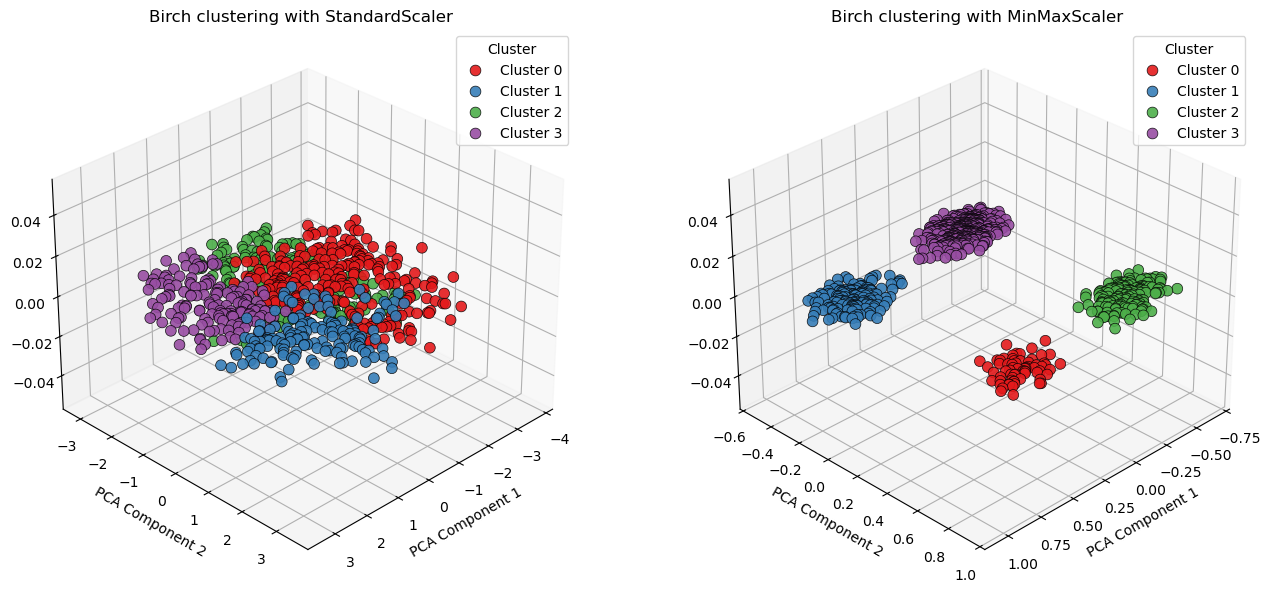

In [25]:
from sklearn.cluster import Birch
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=3)  # 3D PCA
    pca_result = pca.fit_transform(scaled_data)
    
    birch_model = Birch(threshold=0.3, n_clusters=4)  
    labels = birch_model.fit_predict(pca_result)
    
    results[scaler_name] = {
        "labels": labels,
        "pca_result": pca_result,
        "scaled_data": scaled_data
    }


fig = plt.figure(figsize=(14, 6))

for i, (scaler_name, res) in enumerate(results.items()):
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    unique_labels = sorted(set(res["labels"]))
    palette = sns.color_palette("Set1", n_colors=len(unique_labels))
    
    for lbl, color in zip(unique_labels, palette):
        idx = res["labels"] == lbl
        ax.scatter(
            res["pca_result"][idx, 0],
            res["pca_result"][idx, 1],
            c=[color],
            label=f'Cluster {lbl}',
            s=60,          # ista veličina kao u PCA/t-SNE
            alpha=0.9,
            edgecolor='k',
            linewidth=0.5
        )
    
    ax.set_title(f"Birch clustering with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="Cluster")
    ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()



## Analiza klasterizacije

In [26]:
df_scaled['Digital_Score'] = (
    df_scaled['Internet_Usage_Score'] +
    df_scaled['Mobile_Literacy_Score'] +
    df_scaled['Basic_Computer_Knowledge_Score']
)

cluster_profile = df_scaled.groupby('Cluster')[
    [
        "Cluster",
        'Digital_Score',
        'Internet_Usage_Score',
        'Mobile_Literacy_Score',
        'Basic_Computer_Knowledge_Score'        
    ]
].mean().round(2).sort_values(by='Digital_Score', ascending=False)

showReports(
    dfs=[cluster_profile],
    titles=["Cluster Profile"] 
)

df_scaled.drop(columns=['Digital_Score'], inplace=True)

Cluster Profile 
 
 
 Cluster 
 Digital_Score 
 Internet_Usage_Score 
 Mobile_Literacy_Score 
 Basic_Computer_Knowledge_Score 
 
 
 
 
 1.0 
 1.55 
 0.50 
 0.53 
 0.51 
 
 
 2.0 
 1.51 
 0.48 
 0.50 
 0.53 
 
 
 0.0 
 1.47 
 0.51 
 0.49 
 0.46 
 
 
 3.0 
 1.41 
 0.50 
 0.45 
 0.46

In [27]:
cluster_names = {
    3: "Basic",
    0: "Intermediate",
    2: "Advanced",
    1: "Expert",
}
df_scaled['Cluster_Name'] = df_scaled['Cluster'].map(cluster_names)

mapping_df = pd.DataFrame(
    list(cluster_names.items()),
    columns=["Cluster Number", "Cluster Name"]
)

showReports(
    dfs=[mapping_df],
    titles=["Cluster Mapping"]
)

Cluster Mapping 
 
 
 Cluster Number 
 Cluster Name 
 
 
 
 
 3 
 Basic 
 
 
 0 
 Intermediate 
 
 
 2 
 Advanced 
 
 
 1 
 Expert

In [28]:
df_original = df.copy()

df_original = df_original.reset_index(drop=True)
df_scaled_reset = df_scaled.reset_index(drop=True)

categorical_cols = ["Gender", "Education_Level", "Employment_Status","Household_Income","Location_Type","Engagement_Level","Employment_Impact"]
'''df_original.head()
for col in categorical_cols:
    df_original[col] = label_encoders[col].inverse_transform(df_original[col])
'''
df_original['Cluster_Name'] = df_scaled_reset['Cluster_Name']

In [235]:
def plot_3d_features(feature1:str,feature2:str,feature3:str,cat_features:list):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    clusters = df_scaled['Cluster_Name'].unique()
    colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))

    for cluster, color in zip(clusters, colors):
        cluster_data = df_scaled[df_scaled['Cluster_Name'] == cluster]
        ax.scatter(
        cluster_data[feature1],
        cluster_data[feature2],
        cluster_data[feature3],
        label=f"{cluster}",
        alpha=0.7,
        s=30)

    ax.set_title(f"3D Scatter Plot: {feature1}, {feature2}, {feature3}")
    ax.set_xlabel(feature1, fontsize=9)
    ax.set_ylabel(feature2, fontsize=9)
    ax.set_zlabel(feature3, fontsize=9)

    '''if(feature1 in cat_features):
        ax.set_xticks(list(label_encoders[feature1].transform(label_encoders[feature1].classes_)))
        ax.set_xticklabels(label_encoders[feature1].classes_, fontsize=8)

    if(feature2 in cat_features):
        ax.set_yticks(list(label_encoders[feature2].transform(label_encoders[feature2].classes_)))
        ax.set_yticklabels(label_encoders[feature2].classes_, fontsize=8)
    if(feature3 in cat_features):
        ax.set_zticks(list(label_encoders[feature3].transform(label_encoders[feature3].classes_)))
        ax.set_zticklabels(label_encoders[feature3].classes_, fontsize=8)'''
        
    ax.legend(loc="best")
    ax.set_box_aspect(None, zoom=0.85)
    plt.show()

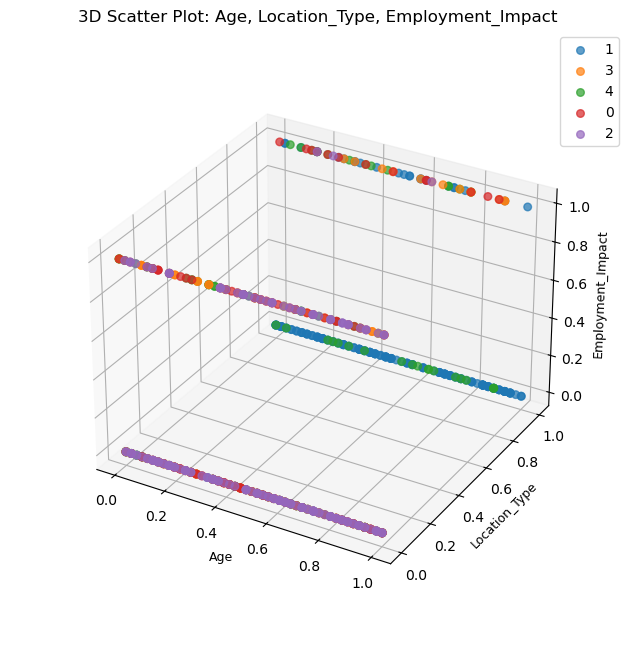

In [214]:
plot_3d_features('Age','Location_Type',"Employment_Impact",cat_features=['Location_Type',"Employment_Impact"])

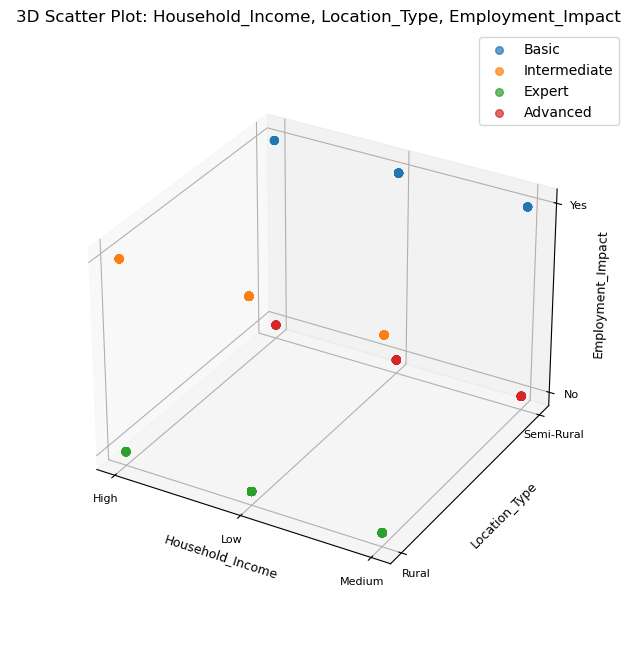

In [31]:
plot_3d_features('Household_Income','Location_Type',"Employment_Impact",cat_features=['Household_Income','Location_Type',"Employment_Impact"])

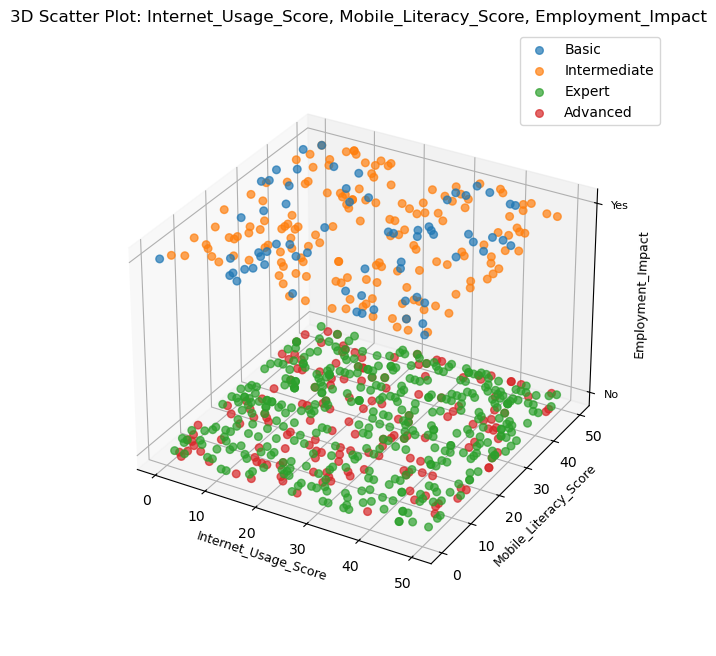

In [41]:
plot_3d_features('Internet_Usage_Score','Mobile_Literacy_Score',"Employment_Impact",cat_features=['Location_Type',"Employment_Impact"])

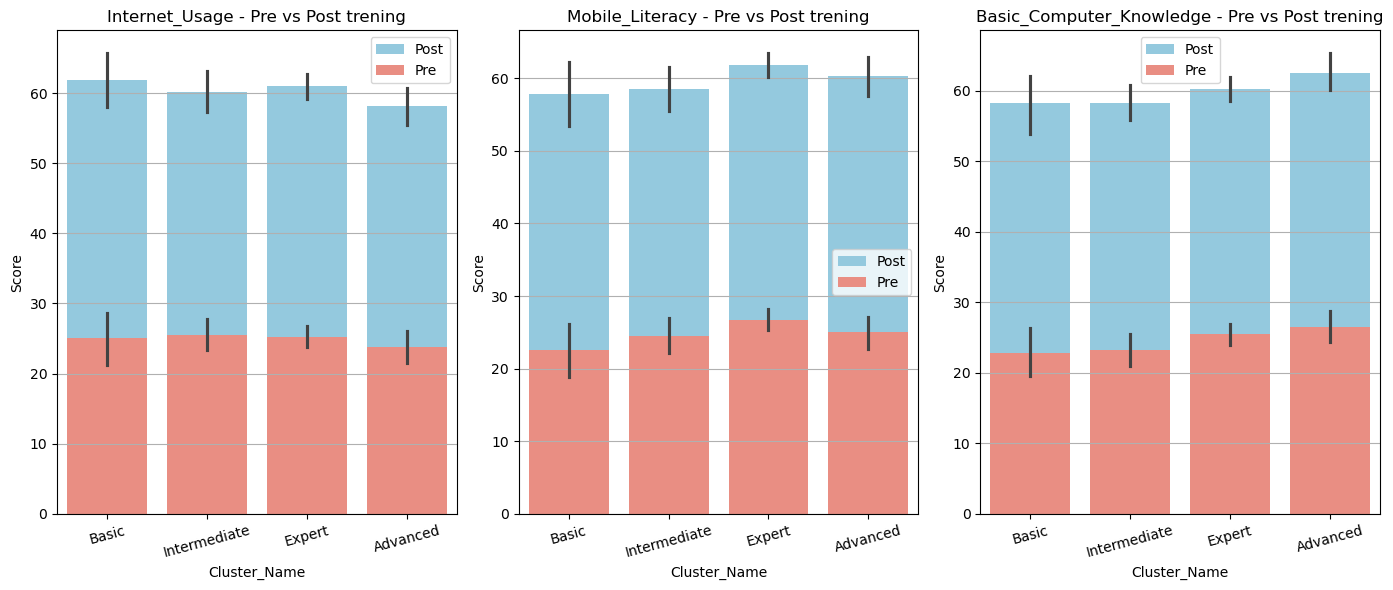

In [ ]:
order = ["Basic", "Intermediate", "Expert", "Advanced"]
atributtes = ['Internet_Usage', 'Mobile_Literacy', 'Basic_Computer_Knowledge']

plt.figure(figsize=(14, 6))
for i, attr in enumerate(atributtes):
    plt.subplot(1, 3, i+1)
    seaborn.barplot(
        x='Cluster_Name', 
        y=f'Post_Training_{attr}_Score', 
        data=df_original, 
        color='skyblue', 
        label='Post',
        order=order
    )
    seaborn.barplot(
        x='Cluster_Name', 
        y=f'{attr}_Score', 
        data=df_original, 
        color='salmon',
        label='Pre',
        order=order
    )
    plt.title(f'{attr} - Pre vs Post trening')
    plt.ylabel('Score')
    plt.xticks(rotation=15)  
    plt.legend(loc='best')
    plt.grid(axis='y')
plt.tight_layout()
plt.show()